<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [2]:
# from IPython.display import YouTubeVideo

# YouTubeVideo('Jml7NVYm8cs')

In [3]:
%pwd

'c:\\Users\\whats\\DS_Unit_4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [4]:
# Import Required Libariries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"


shops = pd.read_csv(url)
shops.sample(15)

,coffee_shop_name,full_review_text,star_rating
528,Apanas Coffee & Beer,10/12/2016 Apanas serves some of the best lat...,5.0 star rating
2876,Dolce Neve,11/28/2014 11 check-ins Listed in Treat yo se...,5.0 star rating
4831,Venezia Italian Gelato,7/3/2016 1 check-in Great service and prices....,5.0 star rating
7011,Tuscany At 360,"1/26/2015 Updated review Bad experience #141,...",1.0 star rating
6142,Epoch Coffee,7/20/2015 Updated review My opinion of this c...,2.0 star rating
606,Apanas Coffee & Beer,1/17/2016 Hands down the best coffee I've eve...,5.0 star rating
2216,Flat Track Coffee,10/20/2014 1 check-in Great place for coffee ...,4.0 star rating
1247,Houndstooth Coffee,9/9/2014 Some of the reviews written for Houn...,5.0 star rating
2180,Flat Track Coffee,11/24/2015 2 check-ins So... this is pretty m...,5.0 star rating
2312,Mary’s Cafe,"4/16/2016 2 check-ins Delicious waffles, bre...",4.0 star rating


In [6]:
# Start here
shops.shape


(7616, 3)

In [7]:
list(shops.columns)

['coffee_shop_name', 'full_review_text', 'star_rating']

In [8]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [9]:
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [10]:
shops.isnull().sum()

coffee_shop_name    0
full_review_text    0
star_rating         0
dtype: int64

In [11]:
# split items in the review column on the first space to parse
# date and star rating
split = shops['full_review_text'].str.split(n = 1, expand=True)
star = shops['star_rating'].str.split(n = 1, expand=True)
shops['date'] = split[0]
shops['review'] = split[1]
shops['rating'] = star[0]
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,review,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016,1 check-in Love love loved the atmosphere! Eve...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016,Very cool decor! Good drinks Nice seating How...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016,1 check-in They are located within the Northcr...,4.0


In [12]:
shops = shops.drop(columns=['full_review_text', 'star_rating'],)
shops['review'] = shops['review'].str.lower()
shops.head()

,coffee_shop_name,date,review,rating
0,The Factory - Cafe With a Soul,11/25/2016,1 check-in love love loved the atmosphere! eve...,5.0
1,The Factory - Cafe With a Soul,12/2/2016,"listed in date night: austin, ambiance in aust...",4.0
2,The Factory - Cafe With a Soul,11/30/2016,1 check-in listed in brunch spots i loved the ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016,very cool decor! good drinks nice seating how...,2.0
4,The Factory - Cafe With a Soul,12/3/2016,1 check-in they are located within the northcr...,4.0


In [13]:
shops['rating'].dtype

dtype('O')

In [14]:
shops['rating'] = shops['rating'].replace({'1.0':0, '2.0':0, '3.0':0, '4.0':1, '5.0':1})
shops['rating'].value_counts()

1    6140
0    1476
Name: rating, dtype: int64

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### Python tokenizer

In [15]:
# Create tokenizer to collect words, python

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z ]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [16]:
shops['python_tokens'] = shops['review'].apply(tokenize)
shops['python_tokens'].head()

0    [checkin, love, love, loved, the, atmosphere, ...
1    [listed, in, date, night, austin, ambiance, in...
2    [checkin, listed, in, brunch, spots, i, loved,...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [checkin, they, are, located, within, the, nor...
Name: python_tokens, dtype: object

In [17]:
# function taken directly from lecture notebook

def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [18]:
# Use the count function
wc_python = count(shops['python_tokens'])
print(wc_python.shape)
wc_python.head()

(19843, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
24,the,6847,34809,1.0,0.045412,0.045412,0.899028
21,and,6864,26651,2.0,0.034769,0.080180,0.901261
31,a,6246,22756,3.0,0.029687,0.109868,0.820116
7,i,5532,20249,4.0,0.026417,0.136284,0.726366
50,to,5653,17164,5.0,0.022392,0.158676,0.742253


# SpaCy

In [19]:
# Inialize spaCy model and tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [20]:
# Use SpaCy Tokenizer Pipe to look at words
tokens = []

# Return lower case tokens and ignore punctuation & numbers
for doc in tokenizer.pipe(shops['review'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_alpha == True):
            doc_tokens.append(token.text)

    tokens.append(doc_tokens)

shops['spaCy_tokens'] = tokens
shops['spaCy_tokens'].head()

0    [love, love, loved, the, every, corner, of, th...
1    [listed, in, date, ambiance, in, austin, love,...
2    [listed, in, brunch, spots, i, loved, the, ecl...
3    [very, cool, good, drinks, nice, seating, just...
4    [they, are, located, within, the, northcross, ...
Name: spaCy_tokens, dtype: object

In [21]:
# Use the count function
# Results are imilar counts to python, but not identical
wc_spaCy = count(shops['spaCy_tokens'])
print(wc_spaCy.shape)
wc_spaCy.head()

(14396, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
20,the,6847,34649,1.0,0.053618,0.053618,0.899028
17,and,6853,26442,2.0,0.040918,0.094537,0.899816
26,a,6240,22657,3.0,0.035061,0.129598,0.819328
7,i,5511,19990,4.0,0.030934,0.160531,0.723608
41,to,5638,17008,5.0,0.026319,0.186851,0.740284


## Lemmatization

In [22]:
# Lemma function, nlp is the large spacy model from above
def get_lemmas(text):

    doc = nlp(text)
    
    lemmas = []
    for token in doc: 
        if ((token.is_alpha == True) and (token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [23]:
from tqdm import tqdm
tqdm.pandas()

shops['lemmas'] = shops['review'].progress_apply(get_lemmas)
shops.head()

100%|██████████| 7616/7616 [04:36<00:00, 27.58it/s]


,coffee_shop_name,date,review,rating,python_tokens,spaCy_tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016,1 check-in love love loved the atmosphere! eve...,1,"[checkin, love, love, loved, the, atmosphere, ...","[love, love, loved, the, every, corner, of, th...","[check, love, love, love, atmosphere, corner, ..."
1,The Factory - Cafe With a Soul,12/2/2016,"listed in date night: austin, ambiance in aust...",1,"[listed, in, date, night, austin, ambiance, in...","[listed, in, date, ambiance, in, austin, love,...","[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016,1 check-in listed in brunch spots i loved the ...,1,"[checkin, listed, in, brunch, spots, i, loved,...","[listed, in, brunch, spots, i, loved, the, ecl...","[check, list, brunch, spot, love, eclectic, ho..."
3,The Factory - Cafe With a Soul,11/25/2016,very cool decor! good drinks nice seating how...,0,"[very, cool, decor, good, drinks, nice, seatin...","[very, cool, good, drinks, nice, seating, just...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,12/3/2016,1 check-in they are located within the northcr...,1,"[checkin, they, are, located, within, the, nor...","[they, are, located, within, the, northcross, ...","[check, locate, northcross, mall, shopping, ce..."


In [24]:
# Use the count function
wc_lemmas = count(shops['lemmas'])
print(wc_lemmas.shape)
wc_lemmas.head(25)

(13076, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,coffee,4953,10763,1.0,0.030750,0.030750,0.650341
87,place,3892,6059,2.0,0.017310,0.048060,0.511029
146,good,3607,5422,3.0,0.015491,0.063551,0.473608
64,great,2860,3959,4.0,0.011311,0.074862,0.375525
5,check,3174,3468,5.0,0.009908,0.084770,0.416754
147,like,2274,3380,6.0,0.009657,0.094426,0.298582
420,come,1935,2642,7.0,0.007548,0.101974,0.254070
446,time,1767,2393,8.0,0.006837,0.108811,0.232012
28,love,1822,2388,9.0,0.006822,0.115634,0.239233
6,drink,1641,2350,10.0,0.006714,0.122348,0.215467


## Stop Words

In [25]:
# import basic stopwords list (179 words)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\whats\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
# Rename & view stopwords
# Extraneous when using stop words in lemmatization
STOP_WORDS = stopwords.words('english')
print(STOP_WORDS)
len(STOP_WORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [36]:
# Tokenizer requires a string, lemmas is a list
# I wanted to add custom stop words after lemmatization, but was unable to do so
# lem_string did not function as expected
shops['lem_string'] = shops['lemmas'].apply(lambda x: ' '.join(map(str, x)))
shops['lem_string']

0       check love love love atmosphere corner coffee ...
1       list date night austin ambiance austin beautif...
2       check list brunch spot love eclectic homey plu...
3       cool decor good drink nice seating overpriced ...
4       check locate northcross mall shopping center f...
                              ...                        
7611    actually step restaurant chance favorite austi...
7612    ok steeping room awesome great menu item cours...
7613    love come tea atmosphere pretty fresh order st...
7614    food average booth feel clean waitstaff friend...
7615    finally stop lunch colleague glad delicious co...
Name: lem_string, Length: 7616, dtype: object

In [37]:
tokens = []
for doc in tokenizer.pipe(shops['lem_string'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.is_alpha == True)& (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['nostop_tokens'] = tokens

In [33]:
shops.head()

,coffee_shop_name,date,review,rating,python_tokens,spaCy_tokens,lemmas,lem_string,nostop_tokens
0,The Factory - Cafe With a Soul,11/25/2016,1 check-in love love loved the atmosphere! eve...,1,"[checkin, love, love, loved, the, atmosphere, ...","[love, love, loved, the, every, corner, of, th...","[check, love, love, love, atmosphere, corner, ...","check, love, love, love, atmosphere, corner, c...",[idea]
1,The Factory - Cafe With a Soul,12/2/2016,"listed in date night: austin, ambiance in aust...",1,"[listed, in, date, night, austin, ambiance, in...","[listed, in, date, ambiance, in, austin, love,...","[list, date, night, austin, ambiance, austin, ...","list, date, night, austin, ambiance, austin, b...",[nice]
2,The Factory - Cafe With a Soul,11/30/2016,1 check-in listed in brunch spots i loved the ...,1,"[checkin, listed, in, brunch, spots, i, loved,...","[listed, in, brunch, spots, i, loved, the, ecl...","[check, list, brunch, spot, love, eclectic, ho...","check, list, brunch, spot, love, eclectic, hom...",[soul]
3,The Factory - Cafe With a Soul,11/25/2016,very cool decor! good drinks nice seating how...,0,"[very, cool, decor, good, drinks, nice, seatin...","[very, cool, good, drinks, nice, seating, just...","[cool, decor, good, drink, nice, seating, over...","cool, decor, good, drink, nice, seating, overp...",[place]
4,The Factory - Cafe With a Soul,12/3/2016,1 check-in they are located within the northcr...,1,"[checkin, they, are, located, within, the, nor...","[they, are, located, within, the, northcross, ...","[check, locate, northcross, mall, shopping, ce...","check, locate, northcross, mall, shopping, cen...",[soul]


In [34]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['nostop_tokens'].apply(lambda x: word_counts.update(x))

len(word_counts)

1727

In [35]:
# Print out the least common words
word_counts.most_common()[:-50:-1] 

[('restriction', 1),
 ('chatty', 1),
 ('scrambler', 1),
 ('pot', 1),
 ('bet', 1),
 ('cesar', 1),
 ('hmmmm', 1),
 ('cuppa', 1),
 ('yogurt', 1),
 ('body', 1),
 ('jasmine', 1),
 ('girlfriend', 1),
 ('eatery', 1),
 ('treasure', 1),
 ('grin', 1),
 ('second', 1),
 ('catering', 1),
 ('noon', 1),
 ('ftw', 1),
 ('envy', 1),
 ('mamma', 1),
 ('alma', 1),
 ('suggest', 1),
 ('bagelwich', 1),
 ('sooner', 1),
 ('admirable', 1),
 ('overwhelm', 1),
 ('rule', 1),
 ('gummie', 1),
 ('non', 1),
 ('vice', 1),
 ('swiss', 1),
 ('goody', 1),
 ('sammich', 1),
 ('sandwhich', 1),
 ('operate', 1),
 ('pepsi', 1),
 ('fee', 1),
 ('sammie', 1),
 ('dot', 1),
 ('password', 1),
 ('succeed', 1),
 ('draw', 1),
 ('exciting', 1),
 ('tavern', 1),
 ('agree', 1),
 ('tonight', 1),
 ('select', 1),
 ('gaming', 1)]

In [40]:
# Print out the 20 most common words
word_counts.most_common(20)

[('coffee', 222),
 ('place', 174),
 ('come', 120),
 ('good', 116),
 ('austin', 107),
 ('latte', 99),
 ('time', 94),
 ('recommend', 85),
 ('work', 71),
 ('day', 65),
 ('try', 64),
 ('spot', 59),
 ('shop', 59),
 ('delicious', 57),
 ('love', 56),
 ('area', 55),
 ('service', 53),
 ('tea', 46),
 ('great', 46),
 ('return', 46)]

In [41]:
df_bad = shops[shops['rating'] == 0]
df_good = shops[shops['rating'] == 1]
shops.shape, df_bad.shape, df_good.shape

((7616, 9), (1476, 9), (6140, 9))

In [51]:
wc_bad = count(df_bad['nostop_tokens'])
print(wc_bad.shape)
wc_bad.head(10)

(6427, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
5,coffee,951,2212,1.0,0.029237,0.029237,0.644309
21,place,756,1232,2.0,0.016284,0.045521,0.512195
19,good,650,1006,3.0,0.013297,0.058818,0.440379
20,like,596,945,4.0,0.012491,0.071309,0.403794
78,order,430,755,5.0,0.009979,0.081288,0.291328
121,come,452,651,6.0,0.008605,0.089893,0.306233
184,time,425,617,7.0,0.008155,0.098048,0.287940
8,drink,365,612,8.0,0.008089,0.106137,0.247290
66,check,488,526,9.0,0.006952,0.113089,0.330623
135,food,324,507,10.0,0.006701,0.119791,0.219512


In [52]:
wc_good = count(df_good['nostop_tokens'])
print(wc_good.shape)
wc_good.head(10)

(11516, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,coffee,4002,8551,1.0,0.031416,0.031416,0.651792
86,place,3136,4827,2.0,0.017734,0.049151,0.510749
178,good,2957,4416,3.0,0.016224,0.065375,0.481596
63,great,2512,3487,4.0,0.012811,0.078186,0.409121
5,check,2686,2942,5.0,0.010809,0.088995,0.437459
181,like,1678,2435,6.0,0.008946,0.097941,0.273290
28,love,1613,2135,7.0,0.007844,0.105785,0.262704
44,austin,1586,2043,8.0,0.007506,0.113291,0.258306
343,come,1483,1991,9.0,0.007315,0.120606,0.241531
12,shop,1349,1805,10.0,0.006632,0.127238,0.219707


In [61]:
# find the intersection of the top 40 words from the good and bad reviews
# use as additional stop words
wc_good_top40= wc_good[wc_good['rank']<41]
wc_bad_top40= wc_bad[wc_bad['rank']<41]

bad_good_shared_top_words = set(wc_bad_top40['word']).intersection(set(wc_good_top40['word']))

len(bad_good_shared_top_words)

28

In [68]:
# add the list of shared words in the top 40 good & bad reviews to add to STOP_WORDS

stoppers = list(bad_good_shared_top_words)

STOP_WORDS = STOP_WORDS + stoppers
len(STOP_WORDS)

207

In [69]:
# remove additional stop words
tokens = []
for doc in tokenizer.pipe(shops['lem_string'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.is_alpha == True)& (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['nostop_tokens_2'] = tokens

In [70]:
wc_nostop = count(shops['nostop_tokens_2'])
print(wc_nostop.shape)
wc_nostop.head()

(13021, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
154,friendly,1635,1733,1.0,0.006312,0.006312,0.214680
639,delicious,1264,1405,2.0,0.005118,0.011430,0.165966
67,lot,1112,1325,3.0,0.004826,0.016256,0.146008
374,staff,1214,1315,4.0,0.004790,0.021046,0.159401
76,want,1010,1223,5.0,0.004455,0.025501,0.132616


In [71]:
# 25% or more words appear in only one document
wc_nostop['appears_in_pct'].describe()

count    13021.000000
mean         0.002425
std          0.009324
min          0.000131
25%          0.000131
50%          0.000263
75%          0.000919
max          0.214680
Name: appears_in_pct, dtype: float64

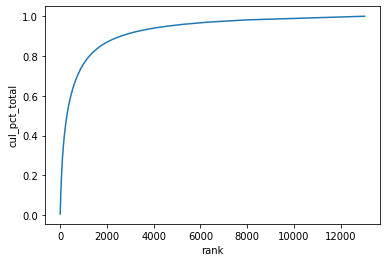

In [72]:
#Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc_nostop);

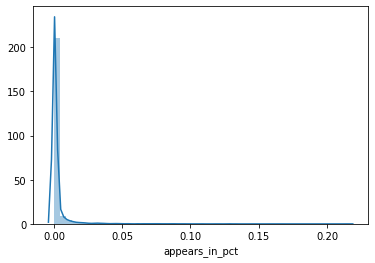

In [73]:
# Frequency of appearance in documents
sns.distplot(wc_nostop['appears_in_pct']);

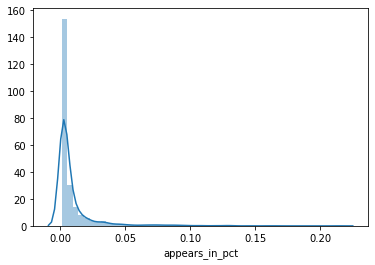

In [74]:
# Tree-Map w/ Words that appear in a least 0.1% (approximately 7) documents. 
wc_short = wc_nostop[wc_nostop['appears_in_pct'] > 0.001]
sns.distplot(wc_short['appears_in_pct']);

In [75]:
wc_short['appears_in_pct'].describe()

count    3182.000000
mean        0.009068
std         0.017241
min         0.001050
25%         0.001576
50%         0.003151
75%         0.008009
max         0.214680
Name: appears_in_pct, dtype: float64

In [76]:
x = 100*(1-3182/14262)
# print(f'By removing words appearing in less than 0.1% of documents the database is reduce by', {x:.2f}, 'percent.')
print(f'By removing words appearing in less than 0.1% of documents the database is reduced by', x, 'percent.')

By removing words appearing in less than 0.1% of documents the database is reduced by 77.68896367970832 percent.


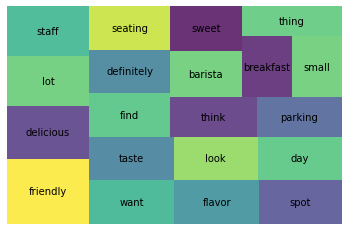

In [77]:
wc_short_top20 = wc_short[wc_short['rank'] <= 20]

squarify.plot(sizes=wc_short_top20['pct_total'], label=wc_short_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [82]:
# redefine good and bad data frames to include token columns
df_bad = shops[shops['rating'] == 0]
df_good = shops[shops['rating'] == 1]
shops.shape, df_bad.shape, df_good.shape

((7616, 10), (1476, 10), (6140, 10))

In [84]:
wc_bad = count(df_bad['nostop_tokens_2'])
print(wc_bad.shape)
wc_bad.head(10)

(6399, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
33,taste,282,387,1.0,0.006428,0.006428,0.191057
285,want,273,348,2.0,0.005780,0.012208,0.184959
159,look,249,328,3.0,0.005448,0.017655,0.168699
699,ask,220,325,4.0,0.005398,0.023053,0.149051
236,think,263,320,5.0,0.005315,0.028368,0.178184
179,barista,230,307,6.0,0.005099,0.033467,0.155827
258,customer,186,294,7.0,0.004883,0.038350,0.126016
68,review,223,276,8.0,0.004584,0.042934,0.151084
171,wait,184,270,9.0,0.004484,0.047419,0.124661
517,say,186,267,10.0,0.004435,0.051854,0.126016


In [86]:
wc_good = count(df_good['nostop_tokens_2'])
print(wc_good.shape)
wc_good.head(10)

(11488, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
131,friendly,1447,1524,1.0,0.007111,0.007111,0.235668
548,delicious,1179,1315,2.0,0.006135,0.013246,0.192020
460,staff,1031,1088,3.0,0.005076,0.018322,0.167915
67,lot,907,1081,4.0,0.005044,0.023366,0.147720
81,spot,860,1031,5.0,0.004810,0.028176,0.140065
40,definitely,893,1007,6.0,0.004698,0.032875,0.145440
112,flavor,679,1005,7.0,0.004689,0.037564,0.110586
138,seating,821,963,8.0,0.004493,0.042057,0.133713
317,day,807,945,9.0,0.004409,0.046466,0.131433
21,find,796,935,10.0,0.004362,0.050828,0.129642


(6399, 7) (11488, 7)


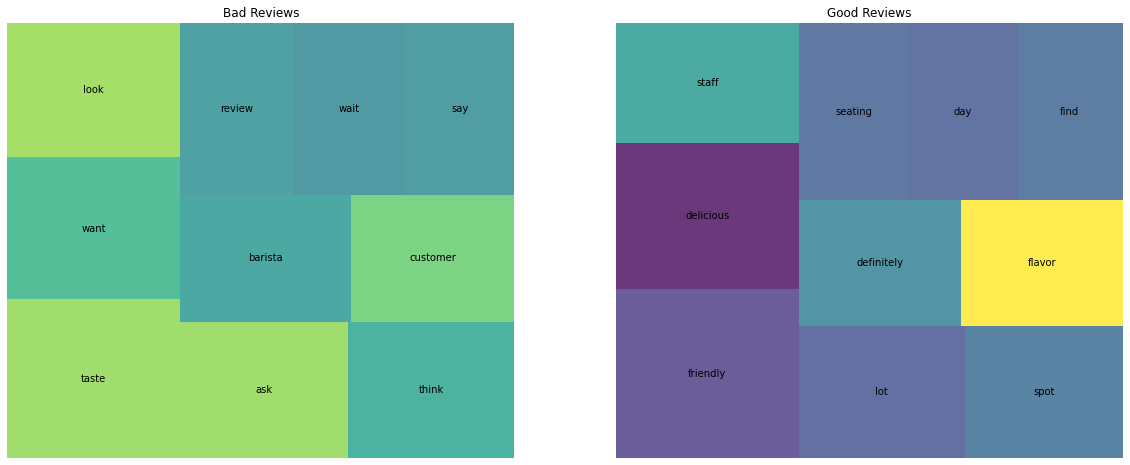

In [93]:
# Visualize top words for all reviews, bad reviews, good reviews
print( wc_bad.shape, wc_good.shape)

# Get top 20 word occurences for each set of data
wc_bad_10 = wc_bad[wc_bad['rank'] <= 10]
wc_good_10 = wc_good[wc_good['rank'] <= 10]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_10['pct_total'], label=wc_bad_10['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Good Reviews')
squarify.plot(sizes=wc_good_10['pct_total'], label=wc_good_10['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 



In [1]:
# # This did not work, I'm not sure of the steps to install scattertext

# import scattertext as st

# corpus = st.CorpusFromPandas(shops, 
#                              category_col='rating', 
#                              text_col='nostop_tokens_2',
#                              nlp=nlp).build()

# html = st.produce_scattertext_explorer(
#     corpus,
#     category='Rating',
#     category_name='Good Review',
#     not_category_name='Bad Review',
#     width_in_pixels=1000,
#     metadata=subset_df['rating'])
# open('./good_vs_bad.html', 'w').write(html)